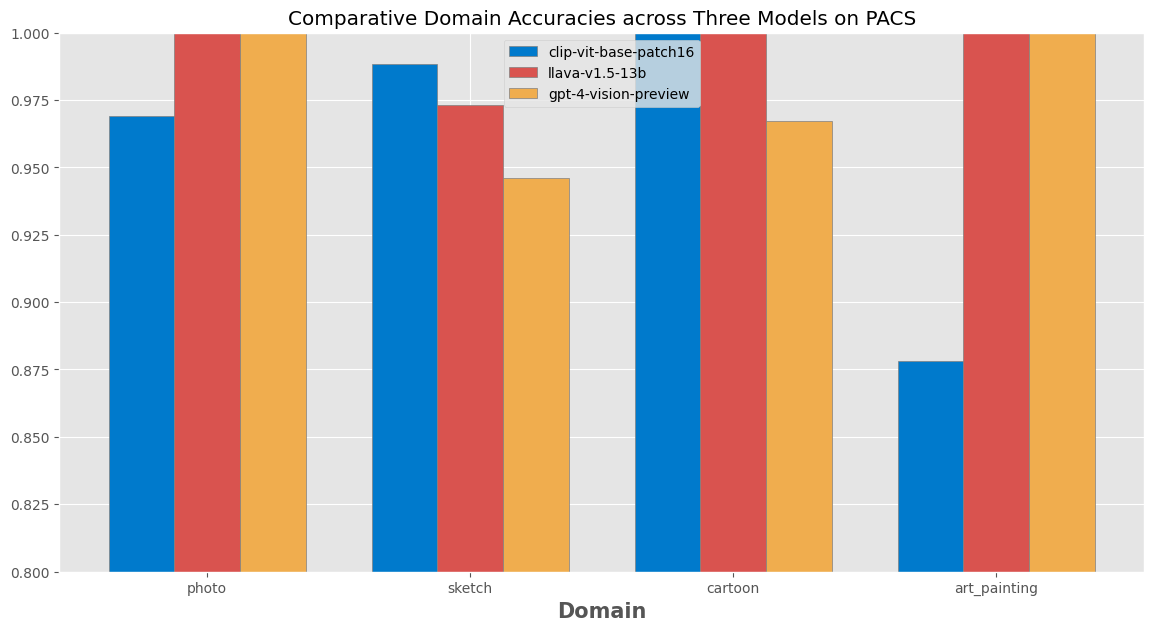

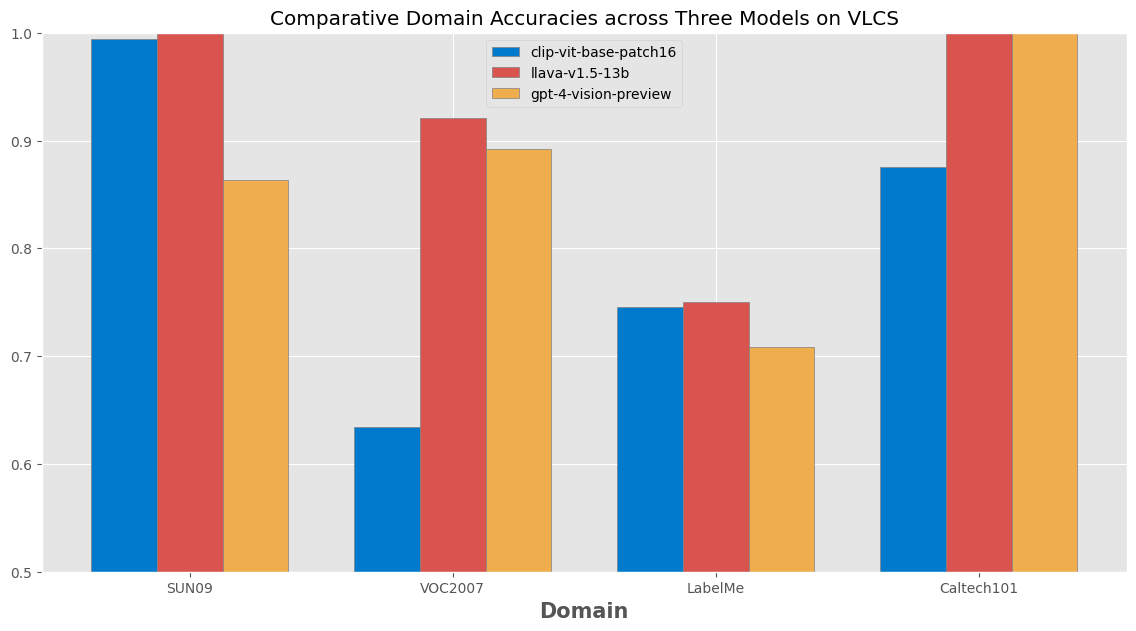

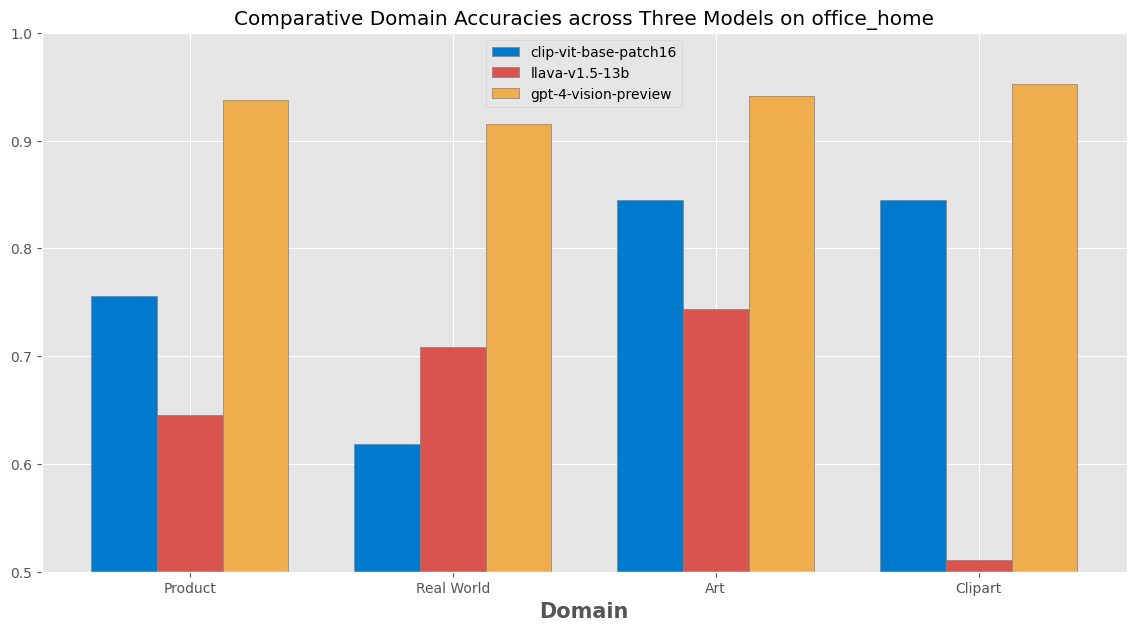

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import json

json_file_paths = {
    'PACS': '../exp_output/2023-11-22-22_21_35',
    'VLCS': '../exp_output/2023-11-22-22_36_30',
    'office_home': '../exp_output/2023-11-24-02_41_54'
}

for dataset, json_file_path in json_file_paths.items():
    # Reading the data back from the file
    with open(json_file_path+'/results_clip-vit-base-patch16.json', 'r') as json_file:
        data_clip = json.load(json_file)
    with open(json_file_path+'/results_llava-v1.5-13b_random.json', 'r') as json_file:
        data_llava = json.load(json_file)
    with open(json_file_path+'/results_gpt-4-vision-preview_random.json', 'r') as json_file:
        data_gpt = json.load(json_file)

    # Assuming 'domains' is a dictionary containing the domain data
    domains = data_clip['datasets'][dataset]['domains']
    domain_names = list(domains.keys())
    domain_accuracies_clip = [domains[domain]['accuracy']
                              for domain in domain_names]
    # Assuming 'domains' is a dictionary containing the domain data
    domains = data_llava['datasets'][dataset]['domains']
    domain_names = list(domains.keys())
    domain_accuracies_llava = [domains[domain]['accuracy']
                               for domain in domain_names]
    # Assuming 'domains' is a dictionary containing the domain data
    domains = data_gpt['datasets'][dataset]['domains']
    domain_names = list(domains.keys())
    domain_accuracies_gpt = [domains[domain]['accuracy']
                             for domain in domain_names]

    # Plotting the accuracies for each domain for all models
    plt.figure(figsize=(14, 7))

    # Width of a bar
    bar_width = 0.25

    # Setting position of bar on X axis
    r1 = np.arange(len(domain_accuracies_clip))
    r2 = [x + bar_width for x in r1]
    r3 = [x + bar_width for x in r2]
    colors = ['#007acc', '#d9534f', '#f0ad4e']
    # Make the plot
    plt.bar(r1, domain_accuracies_clip, color=colors[0],
            width=bar_width, edgecolor='grey', label='clip-vit-base-patch16')
    plt.bar(r2, domain_accuracies_llava, color=colors[1],
            width=bar_width, edgecolor='grey', label='llava-v1.5-13b')
    plt.bar(r3, domain_accuracies_gpt, color=colors[2],
            width=bar_width, edgecolor='grey', label='gpt-4-vision-preview')

    # Add xticks on the middle of the group bars
    plt.xlabel('Domain', fontweight='bold', fontsize=15)
    plt.xticks(
        [r + bar_width for r in range(len(domain_accuracies_clip))], domain_names)
    # Set the y-axis to start from 0.6 to highlight differences
    if dataset == 'PACS':
        plt.ylim(0.8, 1.0)
    elif dataset == 'VLCS':
        plt.ylim(0.5, 1.0)
    elif dataset == 'office_home':
        plt.ylim(0.5, 1.0)
    # Create legend & title
    plt.legend()
    plt.title(
        f'Comparative Domain Accuracies across Three Models on {dataset}')

    # Save the figure
    plt_path = f'./comparative_domain_accuracies_{dataset}.png'
    plt.savefig(plt_path)

    # Show plot
    plt.show()